In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

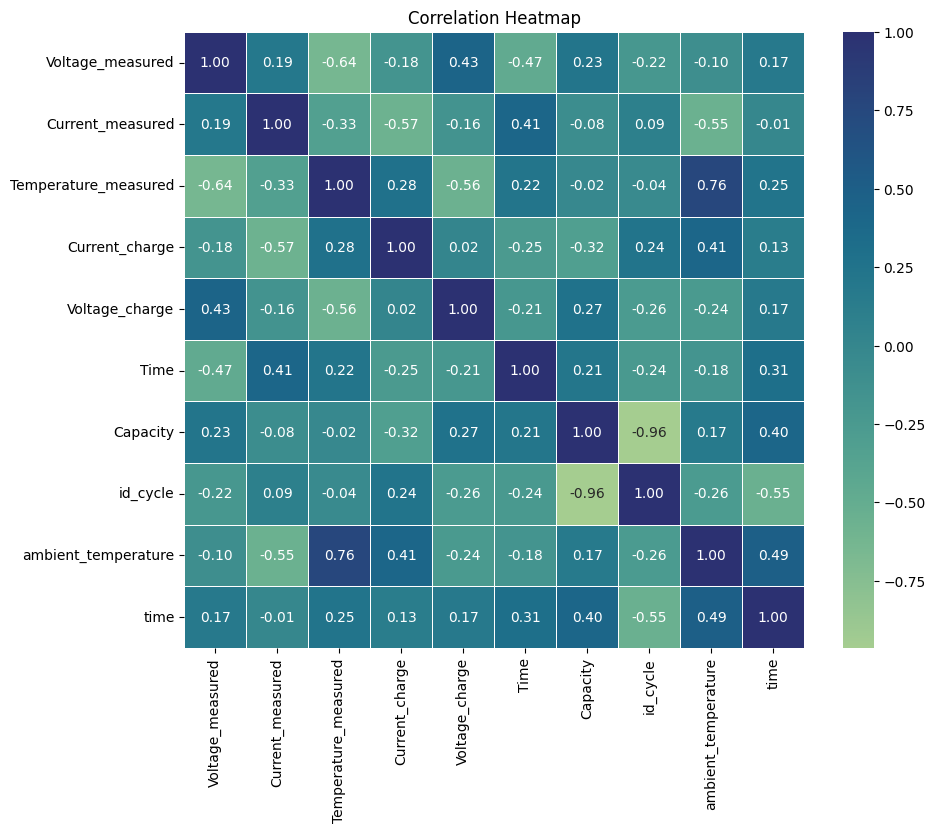

In [13]:
# Load the filtered dataframe
df_discharge = pd.read_csv('./data/df_discharge.csv')

# Drop the 'battery_name' column
df_discharge_corr = df_discharge.drop(['battery_name', 'type'], axis=1)

# Create a correlation matrix
correlation_matrix = df_discharge_corr.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=.5, fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [9]:
print(correlation_matrix['Capacity'])

Voltage_measured        0.225861
Current_measured       -0.082574
Temperature_measured   -0.023382
Current_charge         -0.315494
Voltage_charge          0.269027
Time                    0.210945
Capacity                1.000000
id_cycle               -0.963485
ambient_temperature     0.165488
time                    0.403850
Name: Capacity, dtype: float64


# final training with simple SVR model

# using the saved model for the prediction of the new set of data

Available batteries:
['B0028' 'B0029' 'B0030']


Enter battery names (comma-separated) for training:  B0029


C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



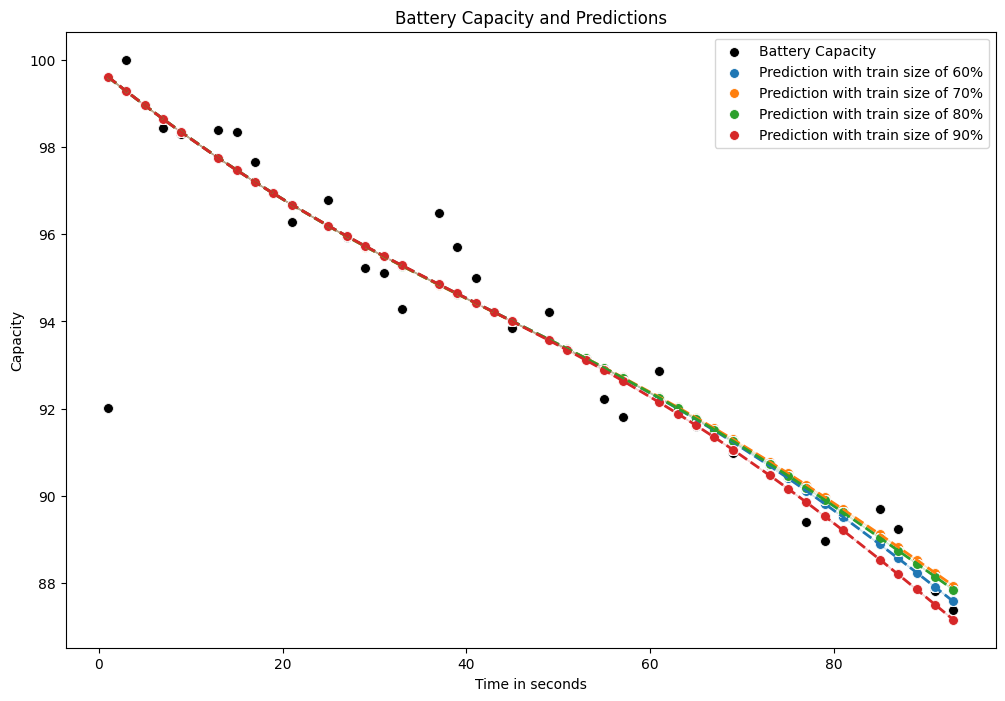

In [59]:


def select_batteries(df):
    print("Available batteries:")
    print(df['battery_name'].unique())
    
    selected_batteries = input("Enter battery names (comma-separated) for training: ").split(', ')
    
    df_selected = df[df['battery_name'].isin(selected_batteries)]
    return df_selected

def train_and_evaluate(X, y, ratios):
    predictions = {}

    for ratio in ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio/100, shuffle=False)
        best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
                      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
        best_svr.fit(X_train, y_train)

        y_pred = best_svr.predict(X)

        predictions[f'y_pred_{ratio}'] = y_pred

    return predictions

def plot_results(X, Y, predictions):
    plt.figure(figsize=(12, 8))

    # Scatter plot for actual battery capacity
    sns.scatterplot(x=X.flatten(), y=Y.flatten(), color='black', label='Battery Capacity', marker='o', s=50)

    for ratio, y_pred in predictions.items():
        # Scatter plot for predicted values
        sns.scatterplot(x=X.flatten(), y=y_pred.flatten(), label=f'Prediction with train size of {100 - int(ratio.split("_")[2])}%', s=50)

        # Line plot for the predicted values
        sns.lineplot(x=X.flatten(), y=y_pred.flatten(), linestyle='dashed', linewidth=2)

    plt.xlabel('Time in seconds')
    plt.ylabel('Capacity')
    plt.title('Battery Capacity and Predictions')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Load the filtered dataframe
    df_soh = pd.read_csv('filtered_df_with_soh.csv')

    # Select batteries for training
    df_selected = select_batteries(df_soh)

    # Select X and y
    X = df_selected['id_cycle'].values.reshape(-1, 1)
    Y = df_selected['SoH'].values.reshape(-1, 1)

    # Specify ratios for training
    ratios = [40, 30, 20, 10]

    # Train and evaluate the model for different ratios
    predictions = train_and_evaluate(X, Y, ratios)

    # Plot the results using seaborn with scatter and line plots
    plot_results(X, Y, predictions)


# select a battery do shuffle for test and training data and do the prediction for test data

# choose one battery for training and use another battery data for prediction

# choose upto a few cycles for training data and choose the remaining ones for test data

# Fix ratio to 60% and train and test again

# finding a best parameter

Available batteries:
['B0028' 'B0029' 'B0030']


Enter battery names (comma-separated) for training:  B0030



Model for train size 60%:
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf; MSE: (test=11.852) R2: (test=-0.769) total time=   0.0s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf; MSE: (test=4.259) R2: (test=-5.567) total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf; MSE: (test=0.306) R2: (test=0.291) total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf; MSE: (test=0.956) R2: (test=0.265) total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf; MSE: (test=9.780) R2: (test=-41.602) total time=   0.0s
[CV 1/5] END C=0.1, gamma=1, kernel=linear; MSE: (test=7.856) R2: (test=-0.173) total time=   5.5s
[CV 2/5] END C=0.1, gamma=1, kernel=linear; MSE: (test=0.446) R2: (test=0.312) total time=   0.4s
[CV 3/5] END C=0.1, gamma=1, kernel=linear; MSE: (test=0.696) R2: (test=-0.610) total time=   0.2s
[CV 4/5] END C=0.1, gamma=1, kernel=linear; MSE: (test=2.317) R2: (test=-0.781) total time=   4.6s
[CV 5/5] END C=0.1, gamma=1, kernel=

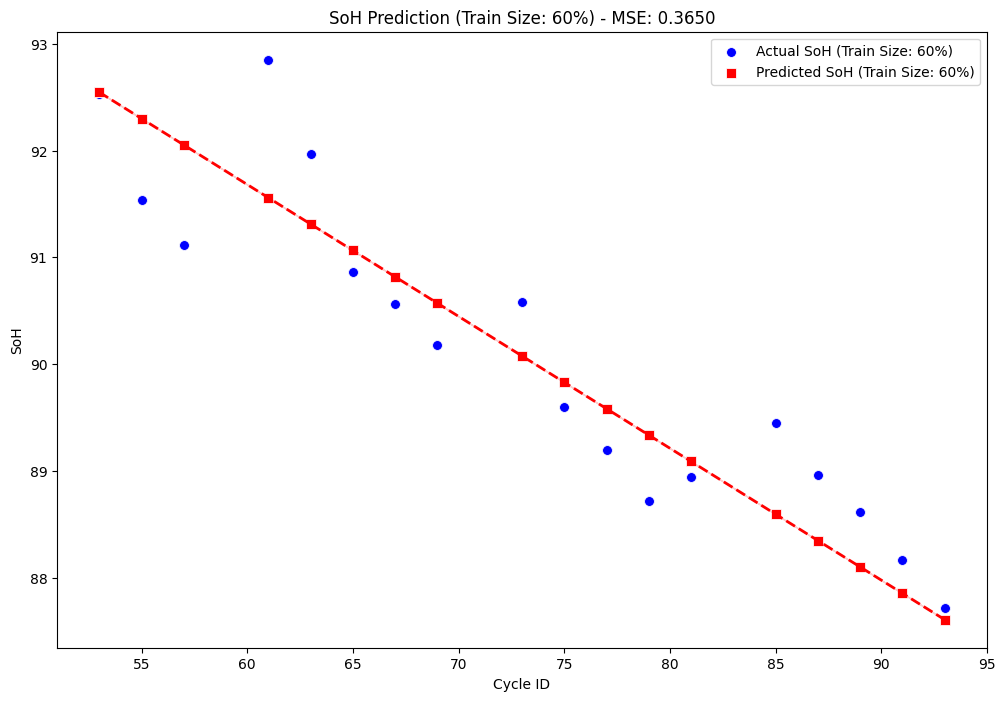

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

def select_batteries(df):
    print("Available batteries:")
    print(df['battery_name'].unique())
    
    selected_batteries = input("Enter battery names (comma-separated) for training: ").split(', ')
    
    df_selected = df[df['battery_name'].isin(selected_batteries)]
    return df_selected

def train_and_evaluate(X, y):
    # Fix the training size to 60%
    ratio = 60
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100 - ratio) / 100, shuffle=False)

    print(f"\nModel for train size {ratio}%:")

    # Define the SVR model
    svm = SVR()
    
    # Define the parameter grid for grid search
    param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear']}
    
    # Define the scoring metrics (you can customize this based on your preference)
    scoring = {'R2': 'r2', 'MSE': make_scorer(mean_squared_error)}

    # Initialize GridSearchCV
    grid = GridSearchCV(svm, param_grid, scoring=scoring, refit='R2', verbose=3)

    # Fit the grid search to the data
    grid.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid.best_params_

    # Get the best model
    best_model = grid.best_estimator_

    # Predict using the best model
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save the best model to the 'model' folder
    model_filename = f'model/best_model.joblib'
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    joblib.dump(best_model, model_filename)

    print(f"   Best Parameters: {best_params}")
    print(f"   MSE: {mse}")
    print(f"   R^2 Score: {r2}")

    return {'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred, 'mse': mse, 'r2_score': r2, 'ratio': ratio}

def plot_results(result):
    X_test = result['X_test']
    y_test = result['y_test']
    y_pred = result['y_pred']
    mse = result['mse']
    ratio = result['ratio']

    plt.figure(figsize=(12, 8))

    # Scatter plot for actual battery capacity
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', label=f'Actual SoH (Train Size: {ratio}%)', marker='o', s=50)

    # Scatter plot for predicted values
    sns.scatterplot(x=X_test.flatten(), y=y_pred, color='red', label=f'Predicted SoH (Train Size: {ratio}%)', marker='s', s=50)

    # Line plot for the predicted values
    sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', linestyle='dashed', linewidth=2)

    plt.xlabel('Cycle ID')
    plt.ylabel('SoH')
    plt.title(f'SoH Prediction (Train Size: {ratio}%) - MSE: {mse:.4f}')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Load the filtered dataframe
    df_soh = pd.read_csv('filtered_df_with_soh.csv')

    # Select batteries for training
    df_selected = select_batteries(df_soh)

    # Select X and y
    X = df_selected['id_cycle'].values.reshape(-1, 1)
    Y = df_selected['SoH'].values

    # Train and evaluate with grid search for hyperparameters
    result = train_and_evaluate(X, Y)

    # Plot the results
    plot_results(result)


# comparing both model one with fitting with gridparam and another with predefined parameter

## B0029

Available batteries:
['B0028' 'B0029' 'B0030']


Enter battery names (comma-separated) for training:  B0029


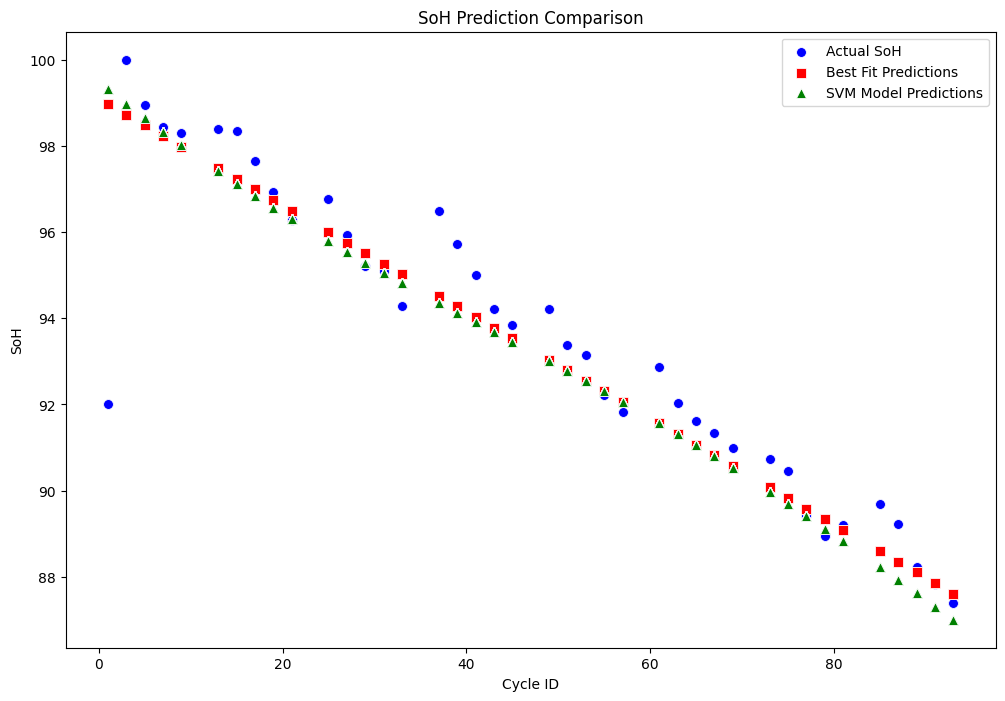

MSE for Best Fit Model: 1.824027622014566
MSE for SVM Model: 2.067802353191432
R^2 Score for Best Fit Model: 0.8450960392885242
R^2 Score for SVM Model: 0.8243936820846538


In [9]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

def select_batteries(df):
    print("Available batteries:")
    print(df['battery_name'].unique())
    
    selected_batteries = input("Enter battery names (comma-separated) for training: ").split(', ')
    
    df_selected = df[df['battery_name'].isin(selected_batteries)]
    return df_selected

def load_and_predict(model_path, data):
    model = joblib.load(model_path)
    predictions = model.predict(data)
    return predictions

def main():
    # Load the filtered dataframe
    df_soh = pd.read_csv('filtered_df_with_soh.csv')

    # Select batteries for analysis
    df_selected = select_batteries(df_soh)

    # Load and predict with the first model
    best_fit_predictions = load_and_predict('model/best_model.joblib', df_selected['id_cycle'].values.reshape(-1, 1))

    # Load and predict with the second model
    svm_60_predictions = load_and_predict('model/model_results_60.joblib', df_selected['id_cycle'].values.reshape(-1, 1))

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=df_selected['id_cycle'], y=df_selected['SoH'], color='blue', label='Actual SoH', marker='o', s=50)
    sns.scatterplot(x=df_selected['id_cycle'], y=best_fit_predictions, color='red', label='Best Fit Predictions', marker='s', s=50)
    sns.scatterplot(x=df_selected['id_cycle'], y=svm_60_predictions, color='green', label='SVM Model Predictions', marker='^', s=50)
    
    plt.xlabel('Cycle ID')
    plt.ylabel('SoH')
    plt.title('SoH Prediction Comparison')
    plt.legend()
    plt.show()

    # Calculate MSE for both models
    mse_best_fit = mean_squared_error(df_selected['SoH'], best_fit_predictions)
    mse_svm_60 = mean_squared_error(df_selected['SoH'], svm_60_predictions)

    # Print MSE for both models
    print(f"MSE for Best Fit Model: {mse_best_fit}")
    print(f"MSE for SVM Model: {mse_svm_60}")

    # Print R^2 Score for both models
    r2_best_fit = r2_score(df_selected['SoH'], best_fit_predictions)
    r2_svm_60 = r2_score(df_selected['SoH'], svm_60_predictions)

    print(f"R^2 Score for Best Fit Model: {r2_best_fit}")
    print(f"R^2 Score for SVM Model: {r2_svm_60}")

if __name__ == "__main__":
    main()


# B0030

Available batteries:
['B0028' 'B0029' 'B0030']


Enter battery names (comma-separated) for training:  B0030


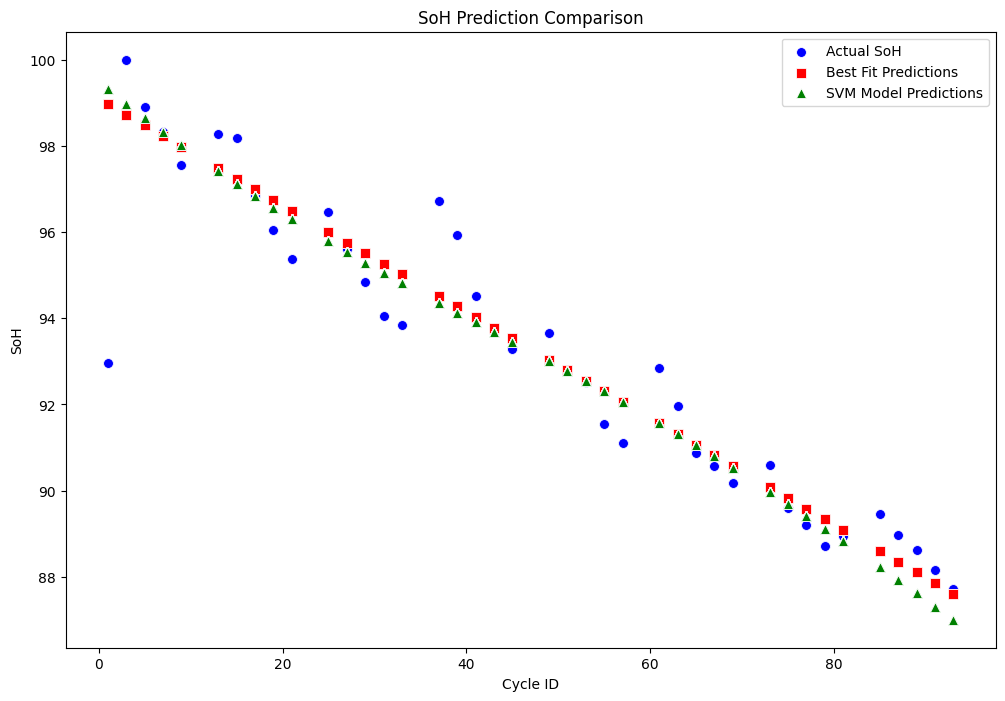

MSE for Best Fit Model: 1.558381395401154
MSE for SVM Model: 1.727190379540372
R^2 Score for Best Fit Model: 0.864455054640056
R^2 Score for SVM Model: 0.8497723815800842


In [10]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

def select_batteries(df):
    print("Available batteries:")
    print(df['battery_name'].unique())
    
    selected_batteries = input("Enter battery names (comma-separated) for training: ").split(', ')
    
    df_selected = df[df['battery_name'].isin(selected_batteries)]
    return df_selected

def load_and_predict(model_path, data):
    model = joblib.load(model_path)
    predictions = model.predict(data)
    return predictions

def main():
    # Load the filtered dataframe
    df_soh = pd.read_csv('filtered_df_with_soh.csv')

    # Select batteries for analysis
    df_selected = select_batteries(df_soh)

    # Load and predict with the first model
    best_fit_predictions = load_and_predict('model/best_model.joblib', df_selected['id_cycle'].values.reshape(-1, 1))

    # Load and predict with the second model
    svm_60_predictions = load_and_predict('model/model_results_60.joblib', df_selected['id_cycle'].values.reshape(-1, 1))

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=df_selected['id_cycle'], y=df_selected['SoH'], color='blue', label='Actual SoH', marker='o', s=50)
    sns.scatterplot(x=df_selected['id_cycle'], y=best_fit_predictions, color='red', label='Best Fit Predictions', marker='s', s=50)
    sns.scatterplot(x=df_selected['id_cycle'], y=svm_60_predictions, color='green', label='SVM Model Predictions', marker='^', s=50)
    
    plt.xlabel('Cycle ID')
    plt.ylabel('SoH')
    plt.title('SoH Prediction Comparison')
    plt.legend()
    plt.show()

    # Calculate MSE for both models
    mse_best_fit = mean_squared_error(df_selected['SoH'], best_fit_predictions)
    mse_svm_60 = mean_squared_error(df_selected['SoH'], svm_60_predictions)

    # Print MSE for both models
    print(f"MSE for Best Fit Model: {mse_best_fit}")
    print(f"MSE for SVM Model: {mse_svm_60}")

    # Print R^2 Score for both models
    r2_best_fit = r2_score(df_selected['SoH'], best_fit_predictions)
    r2_svm_60 = r2_score(df_selected['SoH'], svm_60_predictions)

    print(f"R^2 Score for Best Fit Model: {r2_best_fit}")
    print(f"R^2 Score for SVM Model: {r2_svm_60}")

if __name__ == "__main__":
    main()


# B0029 again

Available batteries:
['B0028' 'B0029' 'B0030']


Enter battery names (comma-separated) for training:  B0030



Model for training:


Enter battery names (comma-separated) for testing:  B0029


   MSE: 2.0784284038747103
   R^2 Score: 0.8234912739644615


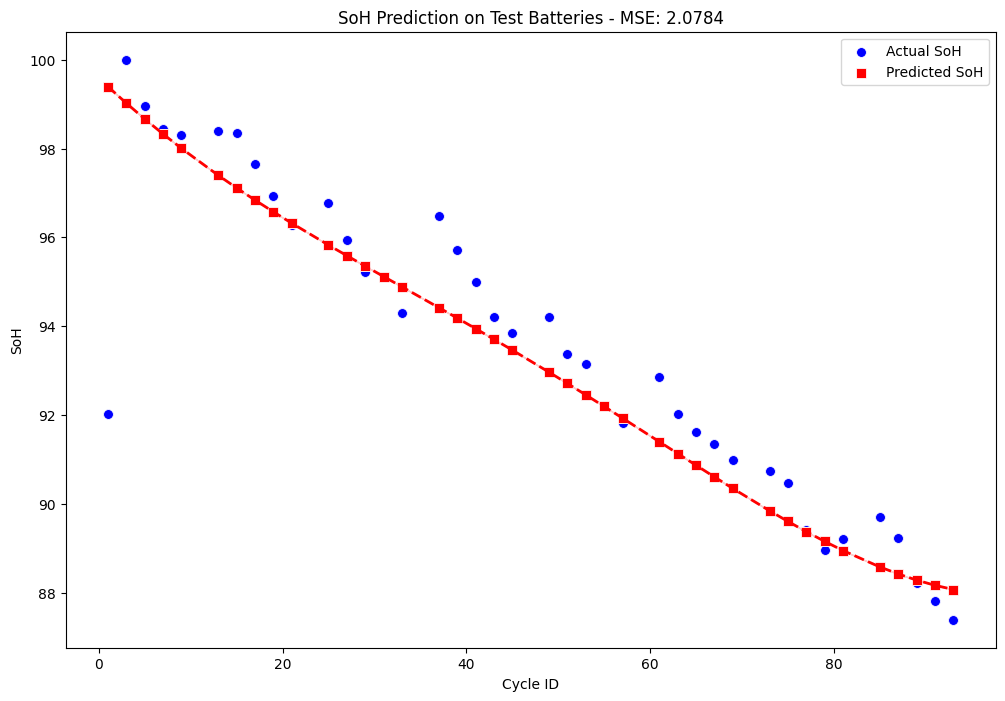

In [3]:

def select_batteries(df):
    print("Available batteries:")
    print(df['battery_name'].unique())
    
    selected_batteries = input("Enter battery names (comma-separated) for training: ").split(', ')
    
    df_selected = df[df['battery_name'].isin(selected_batteries)]
    return df_selected

def train_and_evaluate(X, y, selected_batteries, df):
    # Use the whole selected battery data for training
    X_train = X
    y_train = y

    print("\nModel for training:")

    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
                  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train, y_train)

    # Save the model for training
    model_filename = 'model/model21.joblib'
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    joblib.dump(best_svr, model_filename)

    # Select a different set of batteries for testing
    test_batteries = input("Enter battery names (comma-separated) for testing: ").split(', ')
    df_test = df[df['battery_name'].isin(test_batteries)]

    X_test = df_test['id_cycle'].values.reshape(-1, 1)
    y_test = df_test['SoH'].values

    y_pred = best_svr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save the model for testing
    model_filename_test = 'model/model_results_test.joblib'
    os.makedirs(os.path.dirname(model_filename_test), exist_ok=True)
    joblib.dump(best_svr, model_filename_test)

    print(f"   MSE: {mse}")
    print(f"   R^2 Score: {r2}")

    return {'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred, 'mse': mse, 'r2_score': r2}

def plot_results(result):
    X_test = result['X_test']
    y_test = result['y_test']
    y_pred = result['y_pred']
    mse = result['mse']

    plt.figure(figsize=(12, 8))

    # Scatter plot for actual battery capacity
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', label='Actual SoH', marker='o', s=50)

    # Scatter plot for predicted values
    sns.scatterplot(x=X_test.flatten(), y=y_pred, color='red', label='Predicted SoH', marker='s', s=50)

    # Line plot for the predicted values
    sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', linestyle='dashed', linewidth=2)

    plt.xlabel('Cycle ID')
    plt.ylabel('SoH')
    plt.title(f'SoH Prediction on Test Batteries - MSE: {mse:.4f}')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Load the filtered dataframe
    df_soh = pd.read_csv('filtered_df_with_soh.csv')

    # Select batteries for training
    df_selected = select_batteries(df_soh)

    # Select X and y for training
    X_train = df_selected['id_cycle'].values.reshape(-1, 1)
    y_train = df_selected['SoH'].values

    # Train and evaluate the model on the training set
    result_train = train_and_evaluate(X_train, y_train, df_selected['battery_name'].unique(), df_soh)

    # Plot the results on the training set
    plot_results(result_train)



In [10]:
df_soh = pd.read_csv('filtered_df_with_soh.csv')

# Select batteries for training
df_selected = df_soh[df_soh['battery_name']=='B0030']

# Select X and y
X = df_selected['id_cycle'].values.reshape(-1, 1)
y = df_selected['SoH'].values.reshape(-1, 1)

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

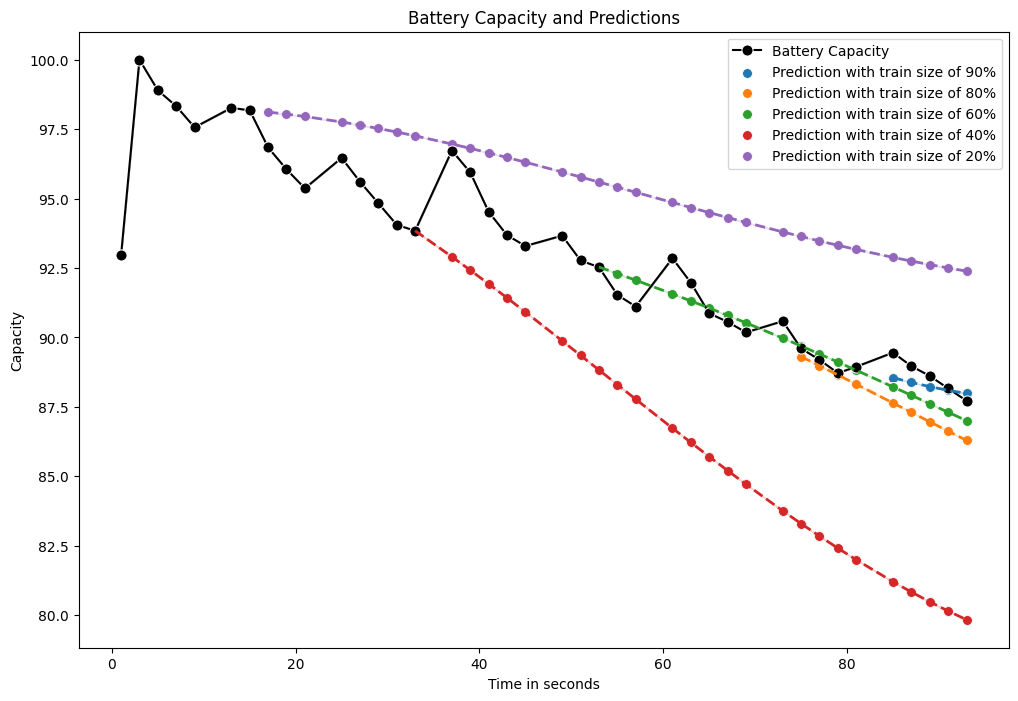

In [14]:
plt.figure(figsize=(12, 8))

# Scatter plot for actual battery capacity
# sns.scatterplot(x=X.flatten(), y=y.flatten(), color='black', label='Battery Capacity', marker='o', s=50)
sns.lineplot(x=X.flatten(), y=y.flatten(), color='black', label='Battery Capacity', marker='o', markersize=8)
ratios = [10, 20, 40, 60, 80]

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio/100, shuffle=False)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
                  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train, y_train)

    y_pred = best_svr.predict(X_test)  # Use test data for prediction

    # Scatter plot for predicted values
    sns.scatterplot(x=X_test.flatten(), y=y_pred.flatten(), label=f'Prediction with train size of {100 - ratio}%', s=50)

    # Line plot for the predicted values
    sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), linestyle='dashed', linewidth=2)

plt.xlabel('Time in seconds')
plt.ylabel('Capacity')
plt.title('Battery Capacity and Predictions')
plt.legend()
plt.show()

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was e

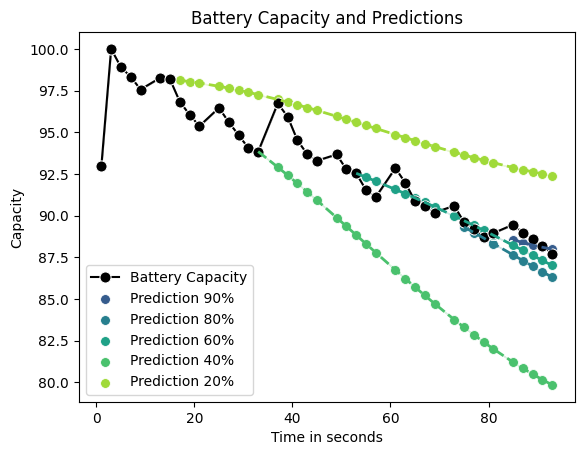

In [15]:
sns.lineplot(x=X.flatten(), y=y.flatten(), color='black', label='Battery Capacity', marker='o', markersize=8)

ratios = [10, 20, 40, 60, 80]
palette = sns.color_palette('viridis', n_colors=len(ratios) + 1)

for i, ratio in enumerate(ratios):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio/100, shuffle=False)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
                  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train, y_train)

    y_pred = best_svr.predict(X_test)

    # Scatter plot for predicted values
    sns.scatterplot(x=X_test.flatten(), y=y_pred.flatten(), label=f'Prediction {100 - ratio}%', s=50, color=palette[i + 1])

    # Line plot for the predicted values
    sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), linestyle='dashed', linewidth=2, color=palette[i + 1])

plt.xlabel('Time in seconds')
plt.ylabel('Capacity')
plt.title('Battery Capacity and Predictions')
plt.legend()
plt.show()

In [16]:
def train_evaluate_plot(X, y, ratio=20, C=20, epsilon=0.0001, gamma=0.0001, cache_size=200, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False):
    plt.figure(figsize=(12, 8))

    # Line plot for actual battery capacity with markers
    plt.plot(X.flatten(), y.flatten(), 'ko-', label='Battery Capacity') 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio/100, shuffle=False)
    svr = SVR(C=C, epsilon=epsilon, gamma=gamma, cache_size=cache_size,
              kernel=kernel, max_iter=max_iter, shrinking=shrinking, tol=tol, verbose=verbose)
    svr.fit(X_train, y_train)

    y_pred = svr.predict(X_test)
    score = r2_score(y_test, y_pred)

    # Scatter plot for predicted values
    sns.scatterplot(x=X_test.flatten(), y=y_pred.flatten(), label=f'Prediction with train size of {100 - ratio}%', s=50)

    # Line plot for the predicted values
    sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), linestyle='dashed', linewidth=2)

    plt.xlabel('No. of Cycles')
    plt.ylabel('Capacity')
    plt.title('Battery Capacity and Predictions')
    plt.legend()
    plt.show()

    # Return the scores
    return score

C:\Users\sarak\anaconda3\envs\portf01\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


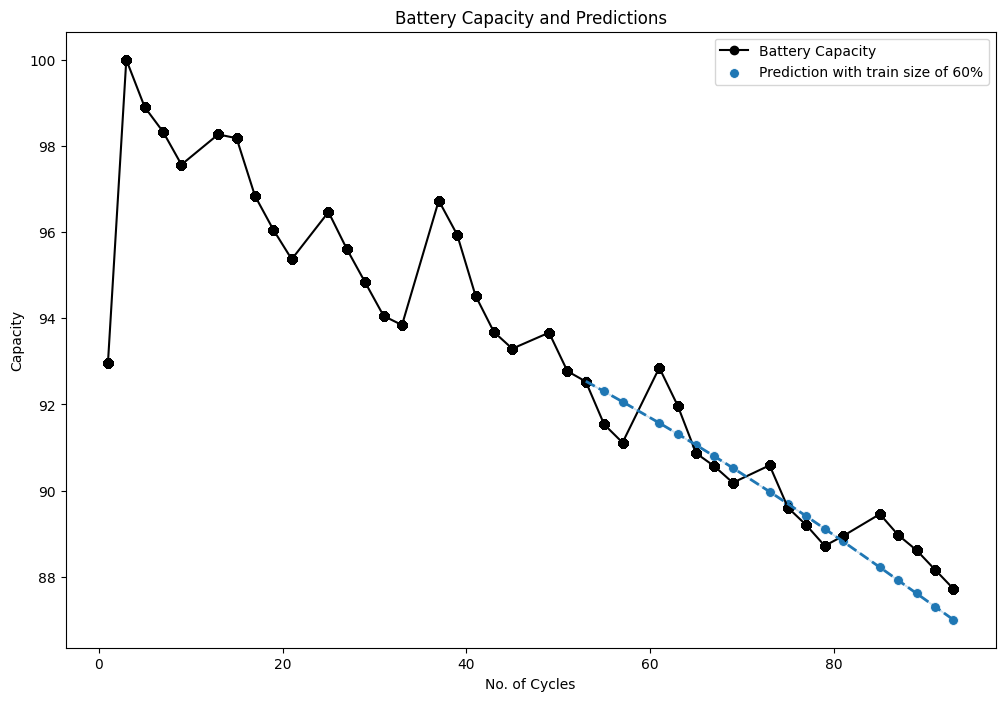

In [17]:
ratio = 40
C = 20
epsilon = 0.0001
gamma = 0.0001
cache_size = 200
kernel = 'rbf'
max_iter = -1
shrinking = True
tol = 0.001
verbose = False

score = train_evaluate_plot(X, y, ratio=ratio, C=C, epsilon=epsilon, gamma=gamma, cache_size=cache_size,
                             kernel=kernel, max_iter=max_iter, shrinking=shrinking, tol=tol, verbose=verbose)
